<a href="https://colab.research.google.com/github/Skyfather1/Random/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
# Model Training and preprocessing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import preprocessing

# Performance evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score

In [ ]:
#Importing Dataframe
water_df = pd.read_csv('/content/water_potability.csv')

##Data Viewing

In [ ]:
water_df.shape

(3276, 10)

In [ ]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
(water_df.isnull().sum() / 3276) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
water_df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

##Data Preprocessing

In [ ]:
#Filling Null Values
water_df['ph'] = water_df['ph'].fillna(water_df['ph'].mean())
water_df['Sulfate'] = water_df['Sulfate'].fillna(water_df['Sulfate'].mean())
water_df['Trihalomethanes'] = water_df['Trihalomethanes'].fillna(water_df['Trihalomethanes'].mean())

In [ ]:
#Splitting Dataframe into Label and everything else for easier Preprocessing
X = water_df.iloc[:,0:8]
y = water_df.iloc[:,9]

In [ ]:
#Inverting Potability Label
y = y - 1
y = abs(y)

In [ ]:
water_df_scaled = X - X.mean()

In [ ]:
water_df_scaled = abs(water_df_scaled)

In [ ]:
water_df_scaled = pd.concat([water_df_scaled, y], axis = 1)

In [ ]:
#Normalizing data between 0 and 1 
for column in water_df_scaled.columns:
    water_df_scaled[column] = water_df_scaled[column]  / water_df_scaled[column].abs().max()
      
#Viewing Normalized data
display(water_df_scaled)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Potability
0,1.254349e-16,0.057212,0.031183,0.026282,1.696522e-01,0.422157,0.278643,0.313665,1.0
1,4.751888e-01,0.449494,0.086299,0.071937,5.551772e-16,0.509511,0.063863,0.153327,1.0
2,1.438157e-01,0.187104,0.053670,0.318097,5.551772e-16,0.023228,0.184350,0.000362,1.0
3,1.745526e-01,0.120882,0.000110,0.138407,1.128569e-01,0.192392,0.296222,0.517001,1.0
4,2.840683e-01,0.102513,0.102902,0.085030,1.154435e-01,0.084962,0.194555,0.523899,1.0
...,...,...,...,...,...,...,...,...,...
3271,3.407376e-01,0.018046,0.651999,0.006552,1.278120e-01,0.306351,0.027867,0.004438,0.0
3272,1.028220e-01,0.018909,0.119457,0.138707,5.551772e-16,0.103185,0.400874,0.000000,0.0
3273,3.302900e-01,0.138359,0.284127,0.033670,5.551772e-16,0.017851,0.231601,0.052531,0.0
3274,2.759622e-01,0.229857,0.255788,0.120958,5.551772e-16,0.071291,0.222334,0.168934,0.0


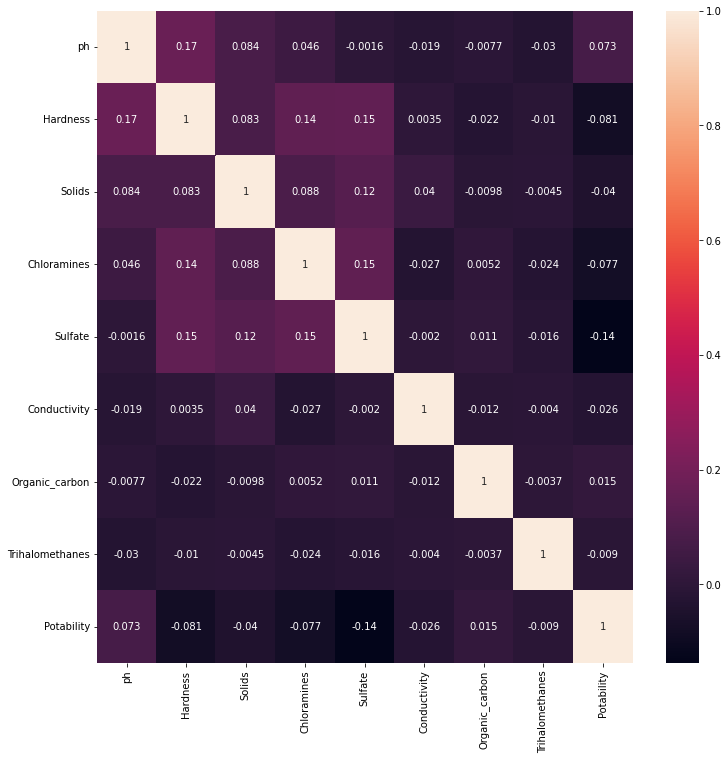

In [ ]:
#Looking for Correlations in the Data
plt.figure(figsize = (12,12))
sns.heatmap(water_df_scaled.corr(), annot = True)

Very Low Correlation of any two factors

In [ ]:
#Selecting Independent and Dependent variables
X = water_df_scaled.iloc[:, 0:8]
y = water_df_scaled['Potability']

In [ ]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##Model Training and Testing

In [ ]:
# Decision Tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train) 

DecisionTreeClassifier()

In [ ]:
# Prediction
pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.5503048780487805

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)


0.6234756097560976

In [ ]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.6478658536585366

In [ ]:
gnb = GaussianNB()
#Gaussian Naive Bayes
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
accuracy = accuracy_score(pred_gnb, y_test)
accuracy

0.6295731707317073

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#K Nearest Neighbors
max_acc = []
num_neigh =  []
for j in range (150, 220):
  for i in range (j,j+1):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
  num_neigh.append(j)
  max_acc.append(accuracy_score(y_pred, y_test))
max_num_neigh = num_neigh[max_acc.index(max(max_acc))]
print(max_num_neigh, max(max_acc))

177 0.6539634146341463
